In [1]:
import time
import sys
from os import path
sys.path.append(path.join(path.dirname(path.abspath("__file__")), '..'))
from pprint import pprint

# import aestimo
# import database
time0 = time.time() # timing audit
# TEMPERATURE


In [ ]:
T = 60.0 #Kelvin
computation_scheme = 2
# drawFigures = True

# QUANTUM
# Total subband number to be calculated for electrons
subnumber_h = 1
subnumber_e = 3
# APPLIED ELECTRIC FIELD
Fapplied =  0.0# (V/m)-20e8
vmax= 1.3
vmin= 0.0
Each_Step=0.05# --------------------------------
# REGIONAL SETTINGS FOR SIMULATION
# --------------------------------
contact=0.0
# GRID
# For 1D, z-axis is choosen
gridfactor = 0.1#nm
maxgridpoints = 200000 #for controlling the size
mat_type='Zincblende'

yfrac = 0.0
xfrac = 0.3
dopant = 0.0

material=[[ 10.0, 'AlGaAs',  xfrac, yfrac, 0.0, 'n','b'],
            [5.0, 'AlGaAs', xfrac, yfrac,5e17, 'n','b'],
            [5.0, 'AlGaAs', xfrac, yfrac,0.0, 'n','b'],
            [ 11.0, 'GaAs', 0.0, 0.0, 0, 'n','w'],
            [5.0, 'AlGaAs', xfrac, yfrac,0.0, 'n','b'],
            [5.0, 'AlGaAs', xfrac, yfrac,5e17, 'n','b'],
            [ 10.0, 'AlGaAs', xfrac, yfrac, 0.0, 'n','b']]
#----------------------------------------

In [3]:
import numpy as np
x_max = sum([layer[0] for layer in material])
def round2int(x):
    return int(x+0.5)
n_max=round2int(x_max/gridfactor)
#----------------------------------------
dop_profile=np.zeros(n_max)
#----------------------------------------
Quantum_Regions=False
Quantum_Regions_boundary=np.zeros((1,2))
Quantum_Regions_boundary[0,0]=25
Quantum_Regions_boundary[0,1]=70
#----------------------------------------
surface=np.zeros(2)
#surface[0]=-0.6
#----------------------------------------
# drawfigures = True
# from os import path

import config as ac

q = 1.602176e-19 #C
meV2J=1e-3*q #meV to Joules
ac.delta_E = 0.5*meV2J #Energy step (Joules) for initial search. Initial delta_E is 1 meV. 
ac.d_E = 1e-5*meV2J #Energy step (Joules) within Newton-Raphson method when improving the precision of the energy of a found level.
ac.E_start = 0.0    #Energy to start shooting method from (if E_start = 0.0 uses minimum of energy of bandstructure)
ac.Estate_convergence_test = 1e-9*meV2J
# FermiDirac
ac.FD_d_E = 1e-9 #Initial and minimum Energy step (meV) for derivative calculation for Newton-Raphson method to find E_F
ac.FD_convergence_test = 1e-6 #meV
ac.np_d_E = 1.0 # Energy step (meV) for dispersion calculations
# Poisson Loop
ac.damping = 0.5    #averaging factor between iterations to smooth convergence.
ac.max_iterations=80 #maximum number of iterations.
ac.convergence_test=1e-6 #convergence is reached when the ground state energy (meV) is stable to within this number between iterations.

# Aestimo_numpy_h
ac.strain = True # for aestimo_numpy_h
ac.piezo=True
#Set material type used in the structure 
ac.Wurtzite=True
ac.Zincblind=False

# Output Files
# ------------
ac.output_directory = "tutorial1_in_notebook"
ac.parameters = True
ac.electricfield_out = True
ac.potential_out = True
ac.sigma_out = True
ac.probability_out = True
ac.states_out = True

# Result Viewer
# -------------
ac.resultviewer = True
ac.wavefunction_scalefactor = 200 # scales wavefunctions when plotting QW diagrams
# Messages
# --------
ac.messagesoff = False
ac.logfile = 'aestimo.log'



INFO Total layer number: 7
INFO Total number of materials in database: 27


{'AVb_E': -6.92,
 'Ac': -7.17,
 'Av': 1.16,
 'B': -1.7,
 'BETAN': 2.0,
 'BETAP': 1.0,
 'Band_offset': 0.65,
 'C11': 11.879,
 'C12': 5.376,
 'Cn0': 2.8e-31,
 'Cp0': 2.8e-32,
 'Eg': 1.4223,
 'Ep': 28.8,
 'F': -1.94,
 'GA1': 6.8,
 'GA2': 1.9,
 'GA3': 2.73,
 'TAUN0': 1e-08,
 'TAUP0': 1e-08,
 'VSATN': 300000.0,
 'VSATP': 600000.0,
 'a0': 5.6533,
 'a0_sub': 5.6533,
 'delta': 0.28,
 'epsilonStatic': 12.9,
 'm_e': 0.067,
 'm_e_alpha': 5.3782e+18,
 'm_hh': 0.45,
 'm_lh': 0.087,
 'mun0': 0.1,
 'mup0': 0.02}
{'AVb_E': -2.1,
 'BETAN': 2.0,
 'BETAP': 1.0,
 'Band_offset': 0.65,
 'Bowing_param': 0.37,
 'Cn0': 2.8e-31,
 'Cp0': 2.8e-32,
 'Material1': 'AlAs',
 'Material2': 'GaAs',
 'TAUN0': 1e-07,
 'TAUP0': 1e-07,
 'VSATN': 300000.0,
 'VSATP': 600000.0,
 'a0_sub': 5.6533,
 'delta_bowing_param': 0.0,
 'm_e_alpha': 5.3782e+18,
 'mun0': 0.15,
 'mup0': 0.1}


INFO Ntotal2d 5e+15 m**-2
INFO Iteration: 1
INFO Iteration: 2


Predictor–corrector method is activated
Iteration: 1
error_potential= 59.2892553105947 meV
Iteration: 2
error_potential= 3.5686494632297614e-12 meV


INFO calculation time  0.320182 s


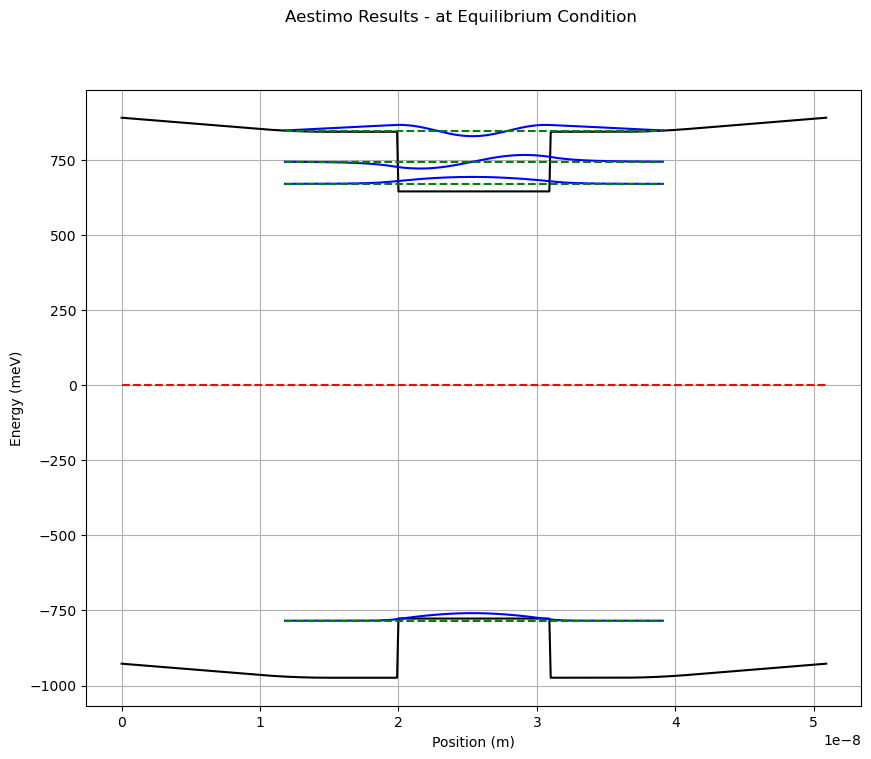

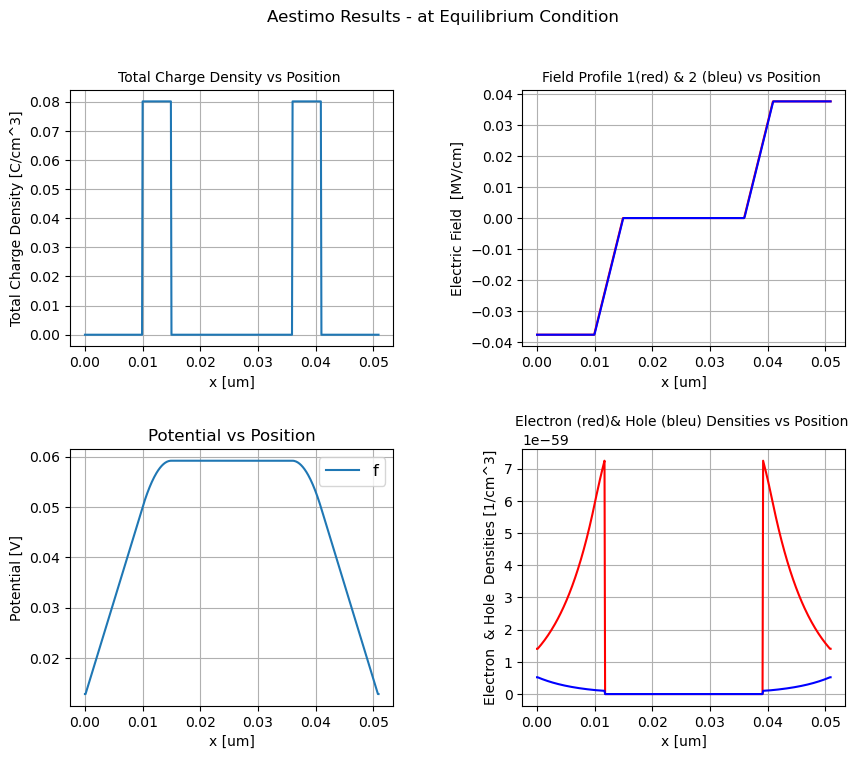

total running time= 6.862271070480347


In [4]:
import aestimo as solver
import database as adatabase

pprint(adatabase.materialproperty['GaAs'])
pprint(adatabase.alloyproperty['AlGaAs'])

input_obj = vars()
# drawFigures = True
model = solver.StructureFrom(input_obj, adatabase)
result = solver.Poisson_Schrodinger(model)
# result_dd = aestimo.Poisson_Schrodinger_DD(result,model)

# %matplotlib inline
solver.drawFigures = True
solver.save_and_plot(result,model)
# aestimo.save_and_plot2(result_dd,model)


time1 = time.time()
print("total running time=",time1-time0)


['EF', 'E_F_general', 'E_state', 'E_state_general', 'E_state_general0', 'E_statec', 'E_statec_general', 'E_statec_general0', 'Ec_result', 'Ev_result', 'F_general', 'Fapp', 'HUPMAT3_reduced_list', 'HUPMATC1', 'N_state', 'N_state_general', 'N_statec', 'N_statec_general', 'N_wells_virtual', 'Ntotal2d', 'Ppz_Psp', 'T', 'V', 'Well_boundary', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__firstlineno__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__static_attributes__', '__str__', '__subclasshook__', '__weakref__', 'dx', 'el_field1_result', 'el_field2_result', 'fi_e', 'fi_h', 'fi_result', 'fitot', 'fitotc', 'm_hh', 'm_lh', 'm_so', 'meff_state_general', 'meff_state_general0', 'meff_statec_general', 'meff_statec_general0', 'nf_result', 'pf_result', 'pol_surf_char', 'ro_

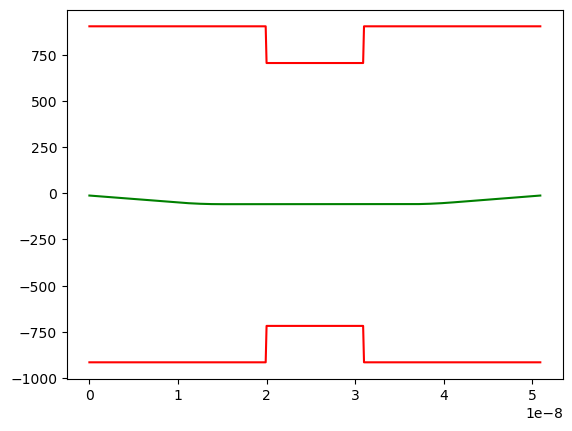

In [5]:
q = 1.602176e-19  # C
J2meV = 1e3 / q  # Joules to meV

print(dir(result))
# result.fitotc
# result.Ev_result
# result.wfh
# result.EF

# result.E_F_general
import matplotlib.pyplot as pl
pl.plot(result.xaxis,result.fi_h * J2meV,"r",result.xaxis,result.fi_e * J2meV,"r")
pl.plot(result.xaxis, result.V * J2meV, "g")
# pl.plot(result.xaxis, result.Vapp * J2meV, "b")
# pl.plot(result.xaxis, result.fitot * J2meV, "k", result.xaxis, result.fitotc * J2meV, "k")
# pl.plot(result.Ec_result)

CB_edge_meV = result.fi_e*J2meV
VB_edge_meV = result.fi_h*J2meV

print(max(CB_edge_meV))
print(min(VB_edge_meV))

# print(min(result.fi_h)*J2meV-max(result.fi_h)*J2meV)

# print(min(result.fitotc)*J2meV)